In [3]:
import pandas as pd

import numpy as np
import scipy as sp
from scipy import signal
from scipy import ndimage
from scipy.ndimage.morphology import binary_closing
from scipy.optimize import curve_fit
from scipy.misc import imsave
import scipy.io as sio

import cv2
from PIL import ImageFilter
from PIL import Image
from skimage.filters import threshold_otsu
from skimage.morphology import remove_small_objects
from skimage.measure import regionprops, label, find_contours
from skimage.restoration import unwrap_phase
from skimage.feature import blob_log, canny
from skimage.exposure import equalize_hist

import random
import os
import fnmatch
import math
import re

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [4]:
def beta(mu, epsilon):
    return np.abs(mu) * np.cos(epsilon)

In [5]:
def noise(mu, epsilon):
    beta = beta(mu, epsilon)
    a = (1-np.pow(np.abs(mu),2))/(2*np.pi)
    b = np.pow(np.pow(1-beta,2),(-3/2))
    c = beta * np.arcsin(beta)+(np.pi*beta)/2 + np.pow(1-np.pow(beta,2),(1/2))
    
    return a*b*c

In [6]:
image_path = "I:\\Honours-Project\\data\\test data\\2017.4.13qc\\frames\\MATLAB_0003.avi_frame0.tif"
#image_path = 'raw_phase.tif'

In [7]:
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

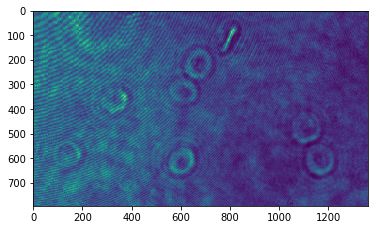

In [8]:
plt.imshow(gray)

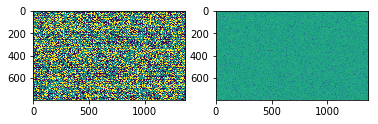

In [9]:
fourier = np.fft.fftshift(np.fft.fft2(gray))
fourier = np.log(np.abs(fourier)+1);
fourier = (fourier - np.min(np.min(fourier)))/(np.max(np.max(fourier))-np.min(np.min(fourier))); #Convert to range [0,1]

c = np.fft.ifft2(np.fft.fftshift(fourier))

ang = np.angle(c)
real = np.abs(c)

fig,ax = plt.subplots(1,2)
ax[0].imshow(ang)

ax[1].imshow(np.log(real))

#plt.imsave('raw_phase_2.tif',ang)